In [24]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

# Corrected State
class BMIState(TypedDict, total=False):  # total=False allows keys to be optional initially
    weight_in_kg: float
    height_in_m: float
    BMI: float
    category: str

# Node 1: Calculate BMI
def bmi_calculation(state: BMIState) -> BMIState:
    weight_in_kg = state['weight_in_kg']
    height_in_m = state['height_in_m']
    
    BMI = weight_in_kg / (height_in_m ** 2)
    state['BMI'] = round(BMI, 2)
    return state

# Node 2: Categorize BMI
def categories(state: BMIState) -> BMIState:
    BMI = state['BMI']

    if BMI < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= BMI < 25:
        state["category"] = "Normal"
    elif 25 <= BMI < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"

    return state

# Graph definition
graph = StateGraph(BMIState)

graph.add_node('bmi_calculation', bmi_calculation)
graph.add_node('categories', categories)

graph.add_edge(START, 'bmi_calculation')
graph.add_edge('bmi_calculation', 'categories')
graph.add_edge('categories', END)

workflow = graph.compile()

# Initial input
initial_state = {'weight_in_kg': 80, 'height_in_m': 1.67}
final_state = workflow.invoke(initial_state)

print(final_state)


{'weight_in_kg': 80, 'height_in_m': 1.67, 'BMI': 28.69, 'category': 'Overweight'}


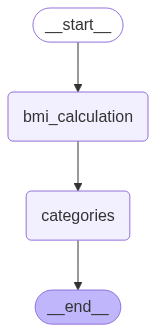

In [25]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())